<a href="https://colab.research.google.com/github/varshum12/Deep-Learning-23sep-2025-weekday/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(x_train , y_train) ,  (x_test , y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [7]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
type(x_train)

numpy.ndarray

In [14]:
import matplotlib.pyplot as plt


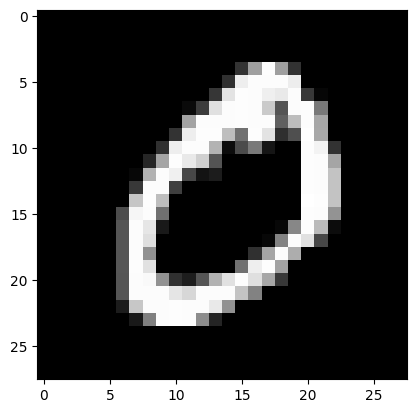

In [19]:
plt.imshow(x_train[1] ,  cmap = 'gray' )

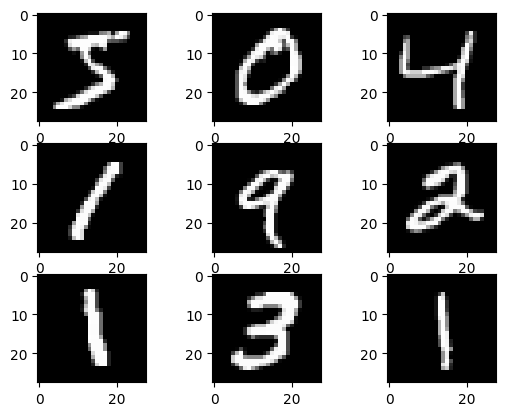

In [23]:
#  first 9 images
for  i  in range(9):
  plt.subplot(  3,3, i+1)
  plt.imshow(x_train[i] ,  cmap  = 'gray')

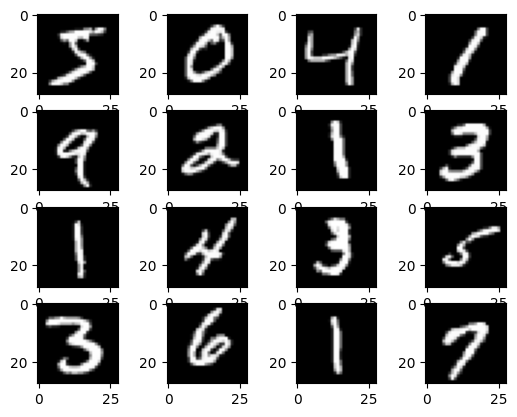

In [25]:
#  first 9 images
for  i  in range(16):
  plt.subplot(  4,4, i+1)
  plt.imshow(x_train[i] ,  cmap  = 'gray')

In [26]:
# preprocessing
x_train1  =  x_train/255
x_test1  =  x_test/255

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
from keras.utils  import  to_categorical

In [30]:
y_train1  = to_categorical(y_train)
y_test1 =  to_categorical(y_test)

In [32]:
y_train1.shape

(60000, 10)

In [33]:
#  create  ARCHITECHTURE

In [34]:
from  keras.models import Sequential
from keras.layers import Dense  , BatchNormalization , Conv2D ,  MaxPool2D , Flatten , Dropout

In [62]:
nn  =  Sequential()

##  ADD CNN  LAYERS
nn.add(Conv2D( filters =  16,
              kernel_size= (3 ,3),
              input_shape  =  (28 , 28  ,  1)))

nn.add(MaxPool2D(pool_size= (2 ,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

##  ADD CNN  LAYERS
nn.add(Conv2D( filters =  16,
              kernel_size= (3 ,3),
             ))

nn.add(MaxPool2D(pool_size= (2 ,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

##  ADD CNN  LAYERS
nn.add(Conv2D(filters =  16  ,
              kernel_size= (3 ,3),
              ))

nn.add(MaxPool2D(pool_size= (2 ,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))


##  add flatten layer
nn.add(Flatten())

##  add  hidden layers
nn.add(Dense(1000 ,  activation =  'relu'))
nn.add(Dropout(0.3))

nn.add(Dense(1000 ,  activation =  'relu'))
nn.add(Dropout(0.3))

nn.add(Dense(1000 ,  activation =  'relu'))
nn.add(Dropout(0.3))

nn.add(Dense(10 , activation  = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
from  keras.callbacks import EarlyStopping
es  =  EarlyStopping(patience= 5  ,  monitor = 'val_loss')

In [64]:
# compile  data
nn.compile(optimizer = 'adam' ,  loss = 'categorical_crossentropy' , metrics  =['accuracy'] ,
           )

In [65]:
x_train1.shape

(60000, 28, 28)

In [66]:
y_train1.shape

(60000, 10)

In [67]:
## fit
hist  =  nn.fit(x_train1  ,  y_train1 , callbacks= es  ,  validation_split= 0.2 , epochs  =  100)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7000 - loss: 0.9132 - val_accuracy: 0.9493 - val_loss: 0.1663
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8827 - loss: 0.3942 - val_accuracy: 0.9621 - val_loss: 0.1281
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9059 - loss: 0.3131 - val_accuracy: 0.9651 - val_loss: 0.1167
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9110 - loss: 0.2955 - val_accuracy: 0.9688 - val_loss: 0.1018
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9177 - loss: 0.2721 - val_accuracy: 0.9707 - val_loss: 0.0963
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9203 - loss: 0.2707 - val_accuracy: 0.9686 - val_loss: 0.1088
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9240 - loss: 0.2526 - val_accuracy: 0.9697 - val_loss: 0.0931
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9305 - loss: 

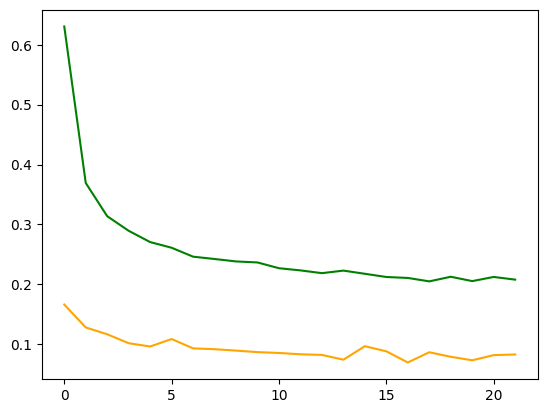

In [68]:
plt.plot(hist.history['loss'] , c = 'green')
plt.plot(hist.history['val_loss'] , c = 'orange')

In [69]:
nn.evaluate(x_train1  , y_train1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0779


[0.07956854999065399, 0.975350022315979]

In [71]:
nn.evaluate(x_test1 , y_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9701 - loss: 0.0944


[0.08174046128988266, 0.9746999740600586]